11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

📘 Training with: He Normal


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



📘 Training with: Glorot Uniform (Xavier)

📘 Training with: Random Normal

📘 Training with: Zeros


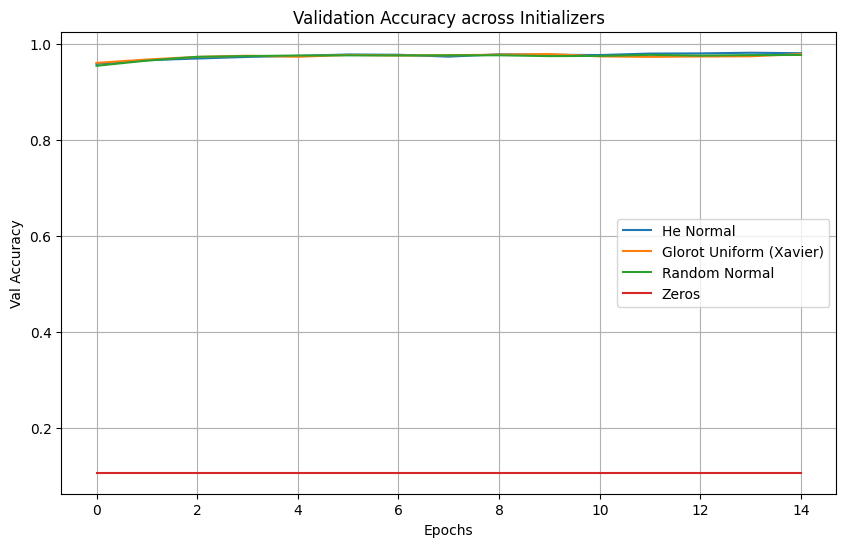

In [ ]:
# 05_initializations_comparison.ipynb

# 📌 Objective: Compare various weight initialization strategies in a deep neural network

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, initializers
import matplotlib.pyplot as plt

# ✅ Load and prepare data
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

# ✅ Build model with custom initializer
def build_model(initializer):
    model = keras.Sequential([
        layers.Dense(256, activation='relu', kernel_initializer=initializer, input_shape=(784,)),
        layers.Dense(128, activation='relu', kernel_initializer=initializer),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# ✅ Training wrapper
def train_with_initializer(name, initializer):
    print(f"\n📘 Training with: {name}")
    model = build_model(initializer)
    history = model.fit(x_train, y_train,
                        epochs=15,
                        batch_size=128,
                        validation_split=0.2,
                        verbose=0)
    return history

# ✅ Define initializers to test
initializers_dict = {
    "He Normal": initializers.HeNormal(),
    "Glorot Uniform (Xavier)": initializers.GlorotUniform(),
    "Random Normal": initializers.RandomNormal(mean=0.0, stddev=0.05),
    "Zeros": initializers.Zeros(),  # poor choice for comparison
}

# ✅ Train and collect histories
histories = {}
for name, init in initializers_dict.items():
    histories[name] = train_with_initializer(name, init)

# ✅ Plot validation accuracy comparison
plt.figure(figsize=(10, 6))
for name, history in histories.items():
    plt.plot(history.history['val_accuracy'], label=name)
plt.title('Validation Accuracy across Initializers')
plt.xlabel('Epochs')
plt.ylabel('Val Accuracy')
plt.legend()
plt.grid(True)
plt.show()